In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import mne
import pywt
import pandas as pd
from scipy.signal import firwin, freqz, filtfilt, lfilter

In [10]:
def get_values(path):
    # Lee el archivo, saltando las tres primeras filas
    df = pd.read_csv(path, sep=',', skiprows=1)
    selected_columns = df.iloc[:, 1:5]
    signals = selected_columns.values
    signals = np.transpose(signals)
    return signals

In [11]:
def rwEnergy(Lista, wavelet='db4', level=4):
    valList = []
    for eeg_signal in Lista:
        coeffs = pywt.wavedec(eeg_signal, wavelet, level=level)
        approx_coeffs = coeffs[0]
        detail_coeffs = coeffs[1:]
        approx_energy = np.sum(np.square(approx_coeffs))
        detail_energies = [np.sum(np.square(detail)) for detail in detail_coeffs]
        total_energy = approx_energy + np.sum(detail_energies)
        relative_approx_energy = approx_energy / total_energy
        relative_detail_energies = [detail_energy / total_energy for detail_energy in detail_energies]
        pairedValues = (relative_approx_energy, relative_detail_energies)
        valList.append(pairedValues)
    return valList

In [12]:
def apply_filter(eeg_signal, fs=200):
    low_cutoff = 1  # Hz
    high_cutoff = 40  # Hz
    Wn = [low_cutoff/(fs/2), high_cutoff/(fs/2)]  # Normalize the frequency
    N_ord = 1
    b_bp, a_bp = signal.butter(N_ord, Wn, btype='band')
    notch_freq = 50  # Hz
    Q = 30 
    b_notch, a_notch = signal.iirnotch(notch_freq / (fs / 2), Q)
    eeg_bandpassed = signal.filtfilt(b_bp, a_bp, eeg_signal)
    # Apply the 50 Hz notch filter
    filtered_signal = signal.filtfilt(b_notch, a_notch, eeg_bandpassed)
    
    
    """
    # Frequency response of the filters - PLOTS WERE OBTAINED FROM HERE
    w, h_bp = signal.freqz(b_bp, a_bp, worN=2000)
    w, h_notch = signal.freqz(b_notch, a_notch, worN=2000)

    # Plot the frequency responses
    plt.figure(figsize=(12, 6))

    # Bandpass filter response
    plt.subplot(2, 1, 1)
    plt.plot(w * fs / (2 * np.pi), 20 * np.log10(np.abs(h_bp)), 'b')
    plt.title('1-40 Hz Bandpass Butterworth Filter Frequency Response')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [dB]')
    plt.grid()

    # Notch filter response
    plt.subplot(2, 1, 2)
    plt.plot(w * fs / (2 * np.pi), 20 * np.log10(np.abs(h_notch)), 'r')
    plt.title('50 Hz Notch Filter Frequency Response (Q=30)')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Amplitude [dB]')
    plt.grid()

    plt.tight_layout()
    plt.show()
    """
    
    """
    plt.figure(figsize=(12, 6))

    plt.subplot(3, 1, 1)
    plt.plot(eeg_signal)
    plt.title('Original EEG Signal')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()

    plt.subplot(3, 1, 2)
    plt.plot(eeg_bandpassed)
    plt.title('EEG Signal after 1-40 Hz Bandpass Filter')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()

    plt.subplot(3, 1, 3)
    plt.plot(filtered_signal)
    plt.title('EEG Signal after 50 Hz Notch Filter')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid()

    plt.tight_layout()
    plt.show()
    
    """
    
    return filtered_signal


In [13]:
def normalize(lista):
    normList = []
    for eeg_signal in lista:
        min_value = np.min(eeg_signal)
        max_value = np.max(eeg_signal)
        normalized_signal = (eeg_signal - min_value) / (max_value - min_value)
        plt.figure()
        t = [i/1000 for i in range(0, len(normalized_signal))]
        plt.plot(t, normalized_signal)
        plt.ylabel("Amplitude (mV)")
        plt.xlabel("Time (s)")
        normList.append(normalized_signal)  
    return normList

In [14]:
def filter_signals(listSig):
    filList = []
    for signal in listSig:
        fil_sig = apply_filter(signal)
        # ica = mne.preprocessing.ICA(n_components=15, method="picard", max_iter="auto", random_state=97)
        # ica.fit(fil_sig)
        # muscle_idx_auto, scores = ica.find_bads_muscle(fil_sig)
        #ica.exclude = muscle_idx_auto
        #cor_signal = ica.apply(fil_sig.copy())
        # Visualizar la señal corregida
        # cor_signal.plot(title='Señal Corregida')
        filList.append(fil_sig)
    return filList

(0.9900306085396738, [0.0052184877787625865, 0.0034020333236081048, 0.0011558631038117283, 0.0001930072541436911])
(0.9982743747728137, [0.0009611481121817212, 0.000525651096959752, 0.0002055593284288527, 3.326668961600221e-05])
(0.977966843606813, [0.012374987484002125, 0.007342171310493416, 0.002005417733860435, 0.0003105798648310657])
(0.9761502251967882, [0.013794399823019058, 0.007622820459089348, 0.0020618600907266527, 0.0003706944303767987])
(0.9972862967506521, [0.0018866586741613334, 0.000627952761991317, 0.0001704620757208495, 2.8629737474462052e-05])
(0.9994496873253835, [0.0003477139106739677, 0.00014187649124287755, 5.546712580690737e-05, 5.255146892787163e-06])
(0.9970078327573317, [0.0021031648624051835, 0.000684316486897591, 0.0001804335449284611, 2.4252348437032222e-05])
(0.9965971782409048, [0.002319495877276606, 0.0008272509154979016, 0.0002186878774171827, 3.7387088903532295e-05])


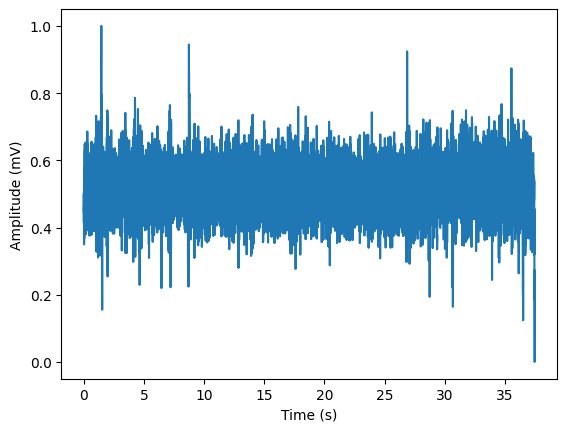

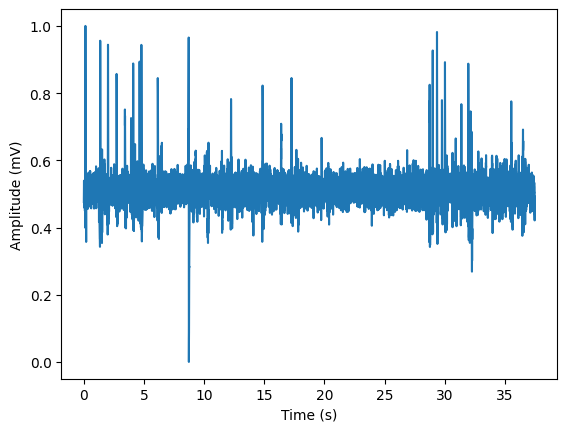

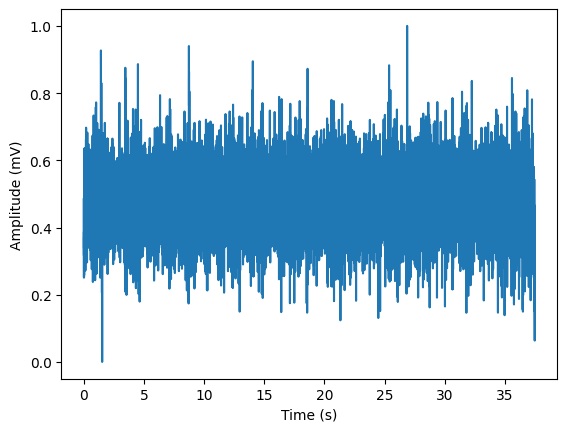

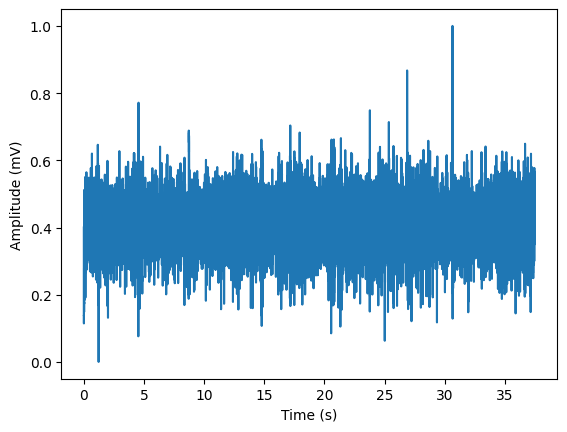

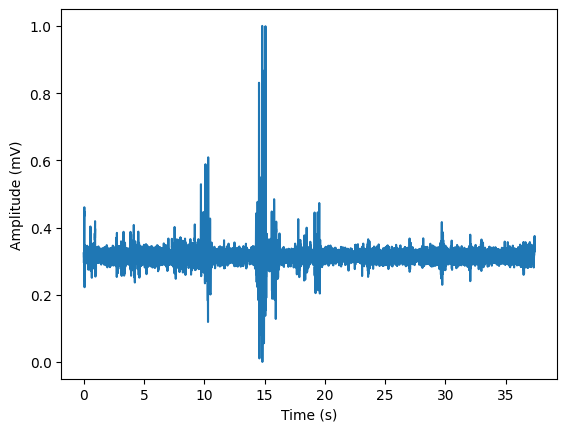

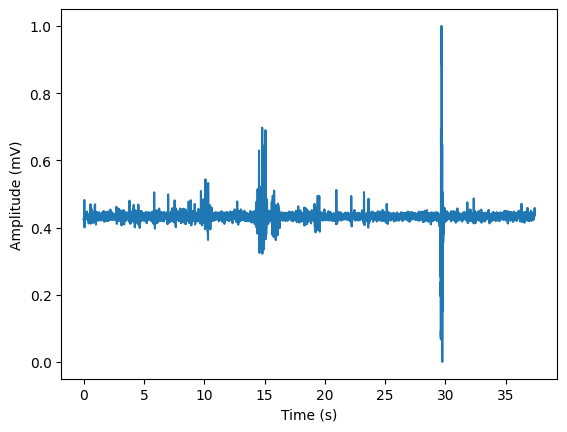

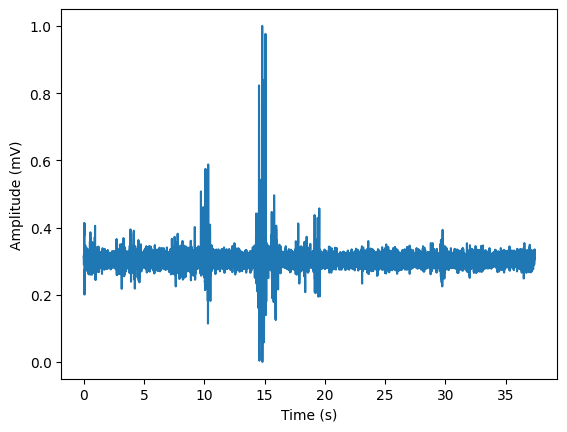

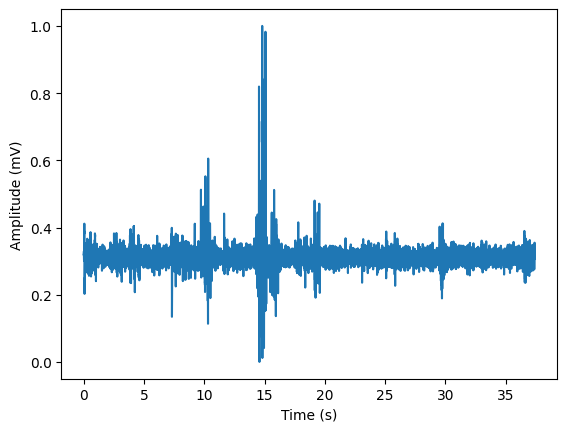

In [15]:
s1 = "s01_ex01_s01.txt"
s2 = "s01_ex01_s02.txt"
Sigs1 = get_values(s1)
Sigs2 = get_values(s2)
filList1 = filter_signals(Sigs1)
filList2 = filter_signals(Sigs2)
normList1 = normalize(filList1)
normList2 = normalize(filList2)
valList1 = rwEnergy(normList1)
valList2 = rwEnergy(normList2)
for i in valList1:
    print(i)
for i in valList2:
    print(i)
